In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset 

In [2]:
data = pd.read_csv("SeoulBikeData.csv")
data.head(n=10)

# Summarising the DataFrame with at least two appropriate pandas functions
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2)
count,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8760.000000,8759.000000,8760.000000
mean,704.602055,11.502740,12.914361,58.240183,1.953237,1436.442808,4.074369,0.569111
std,644.997468,6.922779,12.347109,20.584774,21.376612,608.827735,13.061011,0.868746
min,0.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000
25%,191.000000,6.000000,3.500000,42.000000,0.900000,939.500000,-4.700000,0.000000
50%,504.500000,12.000000,13.700000,57.000000,1.500000,1697.500000,5.100000,0.010000
75%,1065.250000,18.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000


### 1.2 Initial visualisation

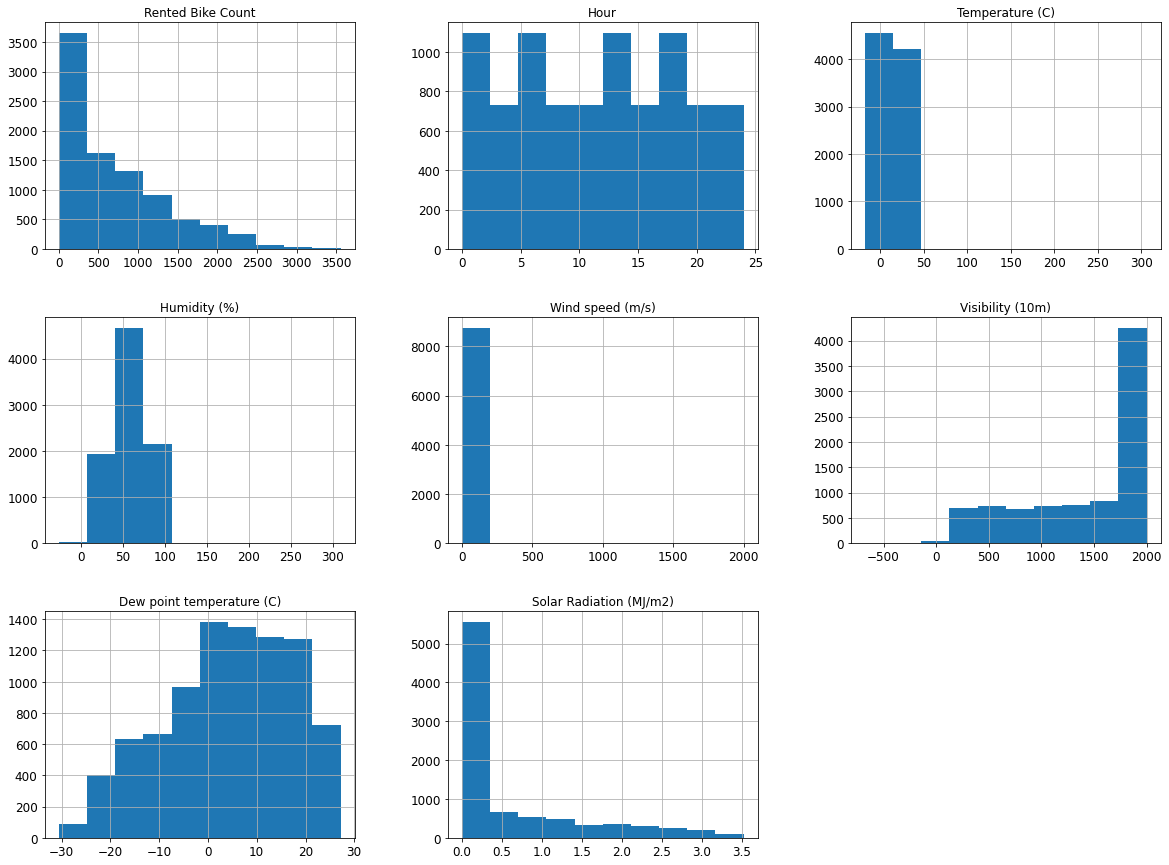

In [3]:
### Your code here
# Histogram of different features
data.hist(figsize = (20,15))
plt.show()

### 1.3 Removing unwanted information

In [4]:
### Your code here
# remove the row where business is closed
dataset = data.loc[assignment1["Functioning Day"] == "Yes"]

# drop Functioning Day feature
dataset = dataset.drop("Functioning Day",axis=1)
dataset.head(n=10)

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0,0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0,0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0,0,Winter,No Holiday
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0,0,Winter,No Holiday
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0,0,Winter,No Holiday
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0,0,Winter,No Holiday
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0,0,Winter,No Holiday
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0,0,Winter,No Holiday


### 1.4 Numerical encoding

In [5]:
### Your code here
# convert Holiday feature to 0 or 1
dataset["Holiday"] = dataset["Holiday"].apply(lambda x: 1 if x == "Holiday" else 0)
dataset.head(n=10)

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0,0,Winter,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0,0,Winter,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0,0,Winter,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0,0,Winter,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0,0,Winter,0
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0,0,Winter,0
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0,0,Winter,0
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0,0,Winter,0
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0,0,Winter,0
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0,0,Winter,0


The Season feature is a little tricker. A number could be assigned to each season, but a better solution in this case is to **add 4 new columns**, each labelled by a season, and each storing 0 or 1 according to the season in each row. In other words, the "Winter" column contains 1 whenever the season is winter, and 0 elsewhere. **Do this for each season. Afterwards, remember to delete the Season feature.**

In [6]:
### Your code here
# add 4 new columns for Season feature
dataset['Winter'] = dataset['Seasons'].map(lambda x: 1 if x == "Winter" else 0)
dataset['Spring'] = dataset['Seasons'].map(lambda x: 1 if x == "Spring" else 0)
dataset['Autumn'] = dataset['Seasons'].map(lambda x: 1 if x == "Autumn" else 0)
dataset['Summer'] = dataset['Seasons'].map(lambda x: 1 if x == "Summer" else 0)

# dropping Season feature
dataset = dataset.drop("Seasons",axis=1)
print(dataset.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Winter', 'Spring', 'Autumn', 'Summer'],
      dtype='object')


It is known that bike rentals depend strongly on whether it's a weekday or a weekend. **Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday.**  To do this, use the function `date_is_weekday` below, which returns 1 if it is a weekday and 0 if it is a weekend.

**Apply the function to the Date column in your DataFrame** (you can use `DataFrame.transform` to apply it).

In [7]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

### Your code to apply the function here:
# Rename Date feature to Weekday
dataset.rename(columns = {'Date':'Weekday'}, inplace = True)

# Apply function to convert the feature to 0 or 1
dataset['Weekday'] = dataset['Weekday'].transform(date_is_weekday)
dataset

,Weekday,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Winter,Spring,Autumn,Summer
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,1,0,0,0
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,1,0,0,0
2,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,1,0,0,0
3,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,1,0,0,0
4,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,1003,19,4.2,34,2.6,1894,-10.3,0.0,0,0,0,0,0,1,0
8756,1,764,20,3.4,37,2.3,2000,-9.9,0.0,0,0,0,0,0,1,0
8757,1,694,21,2.6,39,0.3,1968,-9.9,0.0,0,0,0,0,0,1,0
8758,1,712,22,2.1,41,1.0,1859,-9.8,0.0,0,0,0,0,0,1,0


**Convert all the remaining data to numerical format**, with any non-numerical entries set to NaN.

In [8]:
### Your code here
# try except block as it has character values 
def convert(i):
    try:
        c = float(i)
        return c
    except:
        return np.nan
dataset["Rainfall(mm)"] = dataset['Rainfall(mm)'].apply(convert)
dataset['Rainfall(mm)'] = dataset['Rainfall(mm)'].astype(float)
dataset["Snowfall (cm)"] = dataset['Snowfall (cm)'].apply(convert)
dataset['Rainfall(mm)'] = dataset['Rainfall(mm)'].astype(float)
dataset.dtypes

Weekday                        int64
Rented Bike Count              int64
Hour                           int64
Temperature (C)              float64
Humidity (%)                   int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature (C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Holiday                        int64
Winter                         int64
Spring                         int64
Autumn                         int64
Summer                         int64
dtype: object

## Step 2: Visualise the data and perform further processing

### 2.1 Visualisation

Use **at least two graphical methods to display your data** and **identify** problematic entries. **Write one sentence** that summarises what you found about problematic entries.

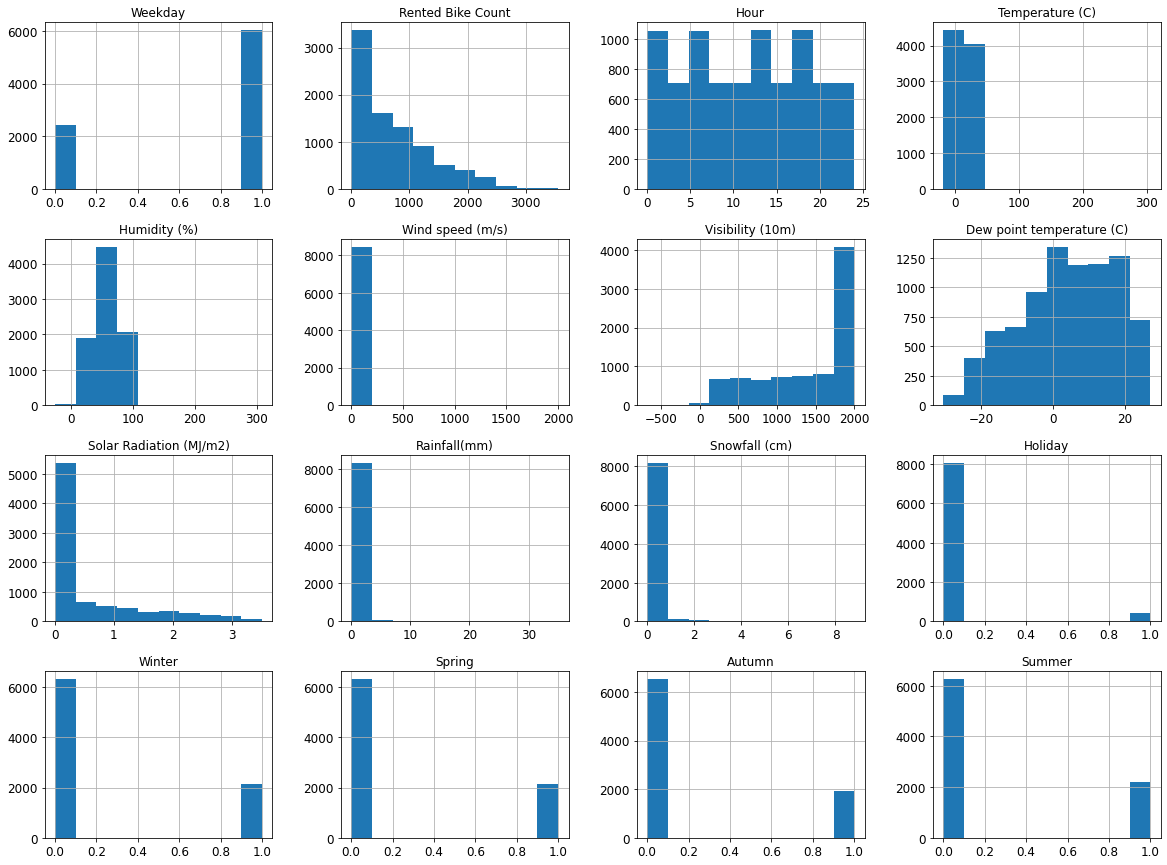

In [9]:
### Your code here
# Graphical method 1 = Histograms
dataset.hist(figsize = (20,15))
plt.show()

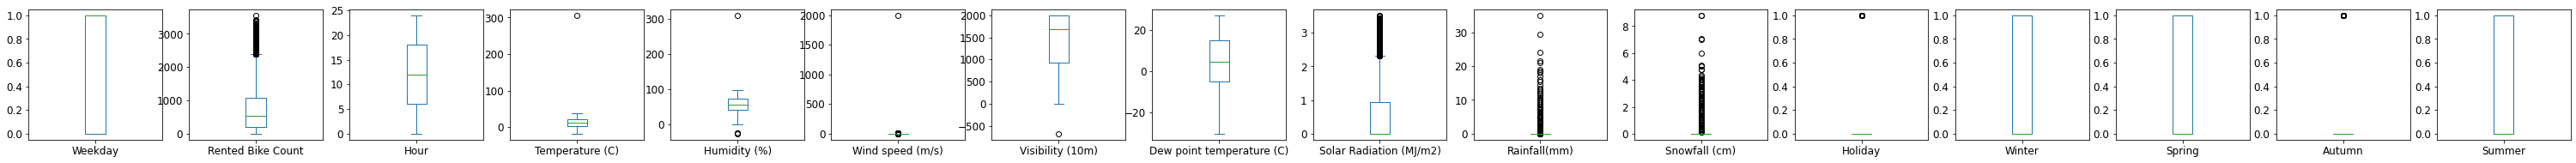

In [10]:
# Graphical method 2 = Boxplots
# for n in range(dataset.shape[1]):
#     plt.boxplot(dataset.iloc[:,n],vert=False)
#     plt.title(f'{dataset.columns[n]}')
#     plt.show()

dataset.plot(kind="box", subplots=True, layout=(30,30), figsize=(100,100))
plt.show()

### Your summary sentence about problematic entries
From the above histograms and boxplots we can say that Temperature, Humidity, Wind speed and Visibility features have problematic values i.e. outliers.

In [11]:
dataset.describe()

,Weekday,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Winter,Spring,Autumn,Summer
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8464.000000,8465.000000,8464.000000,8465.000000,8440.000000,8442.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000
mean,0.711636,729.156999,11.509864,12.803591,58.161607,1.962169,1433.477141,3.945558,0.567868,0.149562,0.077896,0.048198,0.255168,0.255168,0.228825,0.260839
std,0.453028,642.351166,6.921101,12.515429,20.713601,21.744979,609.596083,13.243081,0.868245,1.127177,0.444649,0.214198,0.435982,0.435982,0.420101,0.439118
min,0.000000,2.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,542.000000,12.000000,13.500000,57.000000,1.500000,1689.000000,4.700000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000


After describing the dataset we can verify that Temperature feature have some outliers as it's min value is -17 and max value is 306.
Also Humidity feature have some outliers as it's maximum value is above 100 which is way high. Similarly for Wind speed, 2000 value as max is way too high.

### 2.2 Imputation and Pre-Processing

**Set any problematic values** in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

In [12]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

# Function to set any problemetic values in numerical data to np.nan
def set_outliers(d_f,column_name):
    quar_1 = d_f[column_name].quantile(0.25)
    quar_3 = d_f[column_name].quantile(0.75)
    iqr = quar_3-quar_1
    low = quar_1-1.5*iqr
    high = quar_3+1.5*iqr
    output_df = d_f.copy()
    for i in range(0, len(d_f[column_name])):
        if output_df[column_name].iloc[i] < low or output_df[column_name].iloc[i] > high:
            output_df[column_name].iloc[i] = np.nan
    return output_df

# Applying function 
dataset = set_outliers(dataset, 'Temperature (C)')
dataset = set_outliers(dataset, 'Humidity (%)')
dataset = set_outliers(dataset, 'Wind speed (m/s)')
dataset = set_outliers(dataset, 'Dew point temperature (C)')
dataset = set_outliers(dataset, 'Visibility (10m)')

# sklearn pipeline to perform imputation
preproc_pl = Pipeline([('imputer', SimpleImputer(strategy='median')),
                       ("robust",RobustScaler()),
])
# dataset.describe()

/var/folders/sx/jld5ct396gx68kfl_0j1nchc0000gn/T/ipykernel_57624/569098216.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df[column_name].iloc[i] = np.nan


### 2.3 Correlation 

It is also useful to look at how strongly correlated the features are to the desired target (Rented Bike Count). Before anything else is done it is necessary to **fit and apply the pipeline** above to make a *temporary* version of the whole dataset that is pre-processed. **Why is it important to not use this version of the pre-processed data again?**

In [13]:
### Your code here
# Fit and apply the pipieline
temp_dataset = preproc_pl.fit_transform(dataset)
# temp_dataset

We can see that the daraset is not divided into testing and training data, if we use that there is a high risk for our model to be overfitting.

To visualise the strength of the relationships, display a **scatter plot** for each feature (separately) vs the target variable.  Also **calculate the correlation** of each feature with the target (Hint: pandas function `corr()` or numpy `corrcoef()`). **Which 3 attributes are the most correlated with bike rentals?**

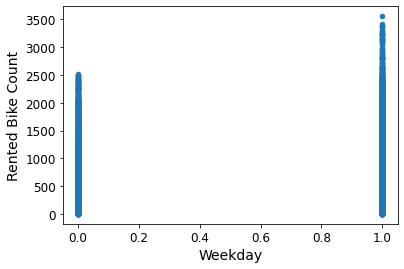

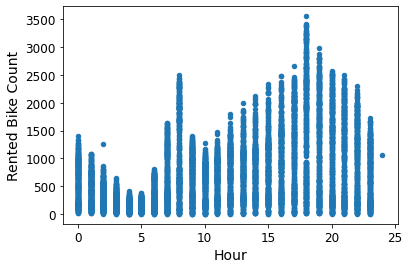

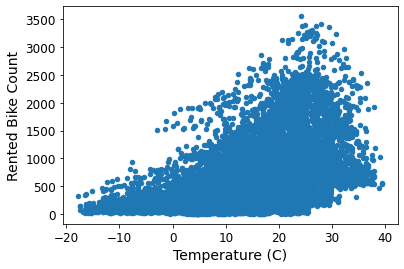

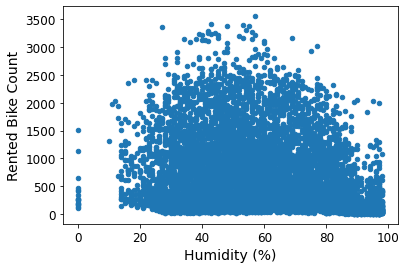

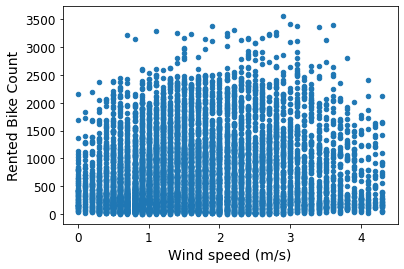

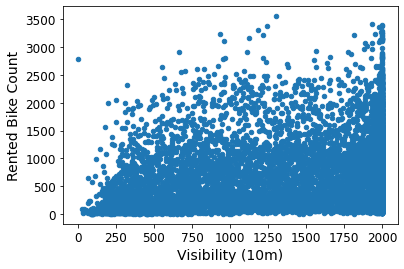

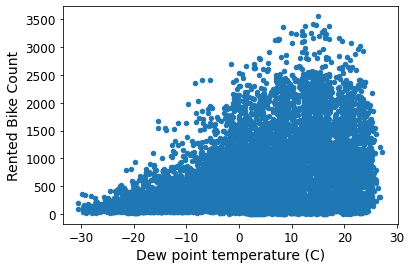

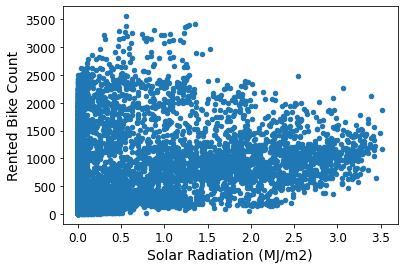

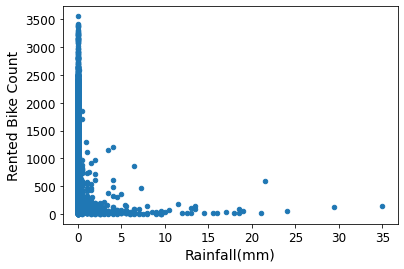

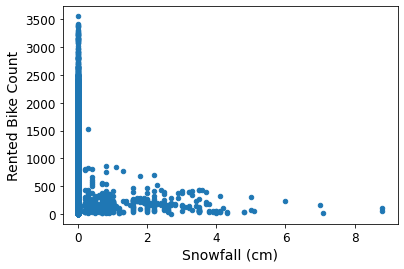

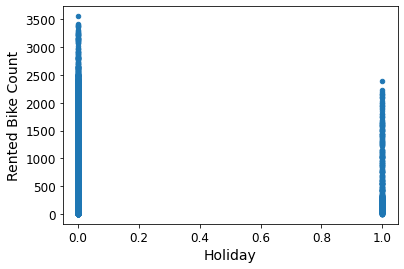

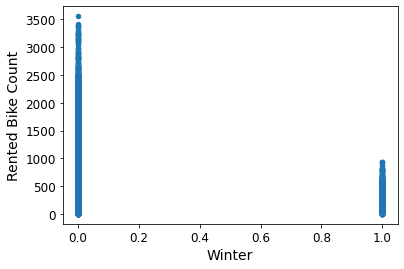

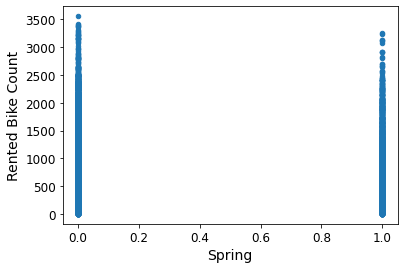

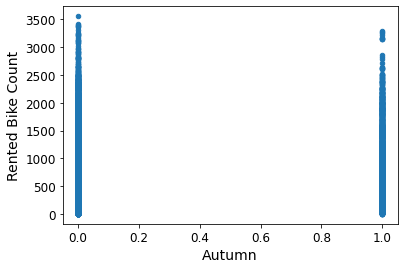

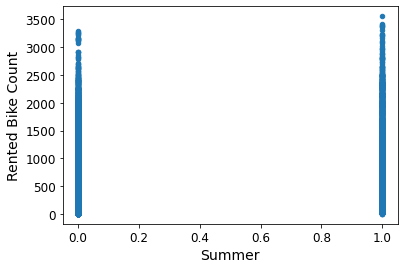

[['Temperature (C)', 0.5627742620278251], ['Winter', -0.45891981543653354], ['Hour', 0.425459623870994]]


In [14]:
### Your code here
# Separate scatter plots for each features vs Rented Bike Count feature
correlation = []
for col in dataset.columns:
    if col == "Rented Bike Count":
        continue
    else: 
        dataset.plot.scatter(x=col, y="Rented Bike Count")
        plt.show()
        # Calculate Correlation 
        correlation.append([col, dataset[col].corr(dataset["Rented Bike Count"])])    
#        correlation.append([col, np.corrcoef(dataset[col], dataset["Rented Bike Count"])])
correlation.sort(key = lambda x:abs(x[1]),reverse = True)
print(correlation[:3])        


Based on above output we can say that the 3 most correlated attributes with bike rentals are Temperature, Winter and Hour.

## Step 3: Predicting bike rentals 

In [15]:
### Your code here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math

train_set,testing_set  = train_test_split(dataset, test_size=0.2, random_state=42)

X_train = train_set.drop(columns=['Rented Bike Count'], axis=1)
y_train = train_set['Rented Bike Count']

X_test = testing_set.drop(columns=['Rented Bike Count'], axis=1)
y_test = testing_set['Rented Bike Count']

#print([X_train.shape,y_train.shape,X_test.shape,y_test.shape])
# print(X_train.head)

# Pipeline
linear_pipeline = Pipeline([("preproc_pl", preproc_pl), ("Linear Regression", LinearRegression())])
linear_model = linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_train)

# calculate rmse
mse = np.square(np.subtract(y_train,y_pred_linear)).mean() 
rmse = math.sqrt(mse)
print('RMSE value for linear regression model :',rmse)


# Baseline rmse
y_train_mean = y_train.mean()
list1 = []
for i in range(len(y_train)):
    list1.append(y_train_mean)
    
mean_series = pd.Series(np.array(list1))
mse_baseline = np.square(np.subtract(y_train,mean_series)).mean() 
rmse_baseline = math.sqrt(mse_baseline)
print('Baseline RMSE value: ', rmse_baseline)

RMSE value for linear regression model : 436.6709079845794
Baseline RMSE value:  650.673486371936


Show an appropriate **visualisation of the fit for your linear regression.**

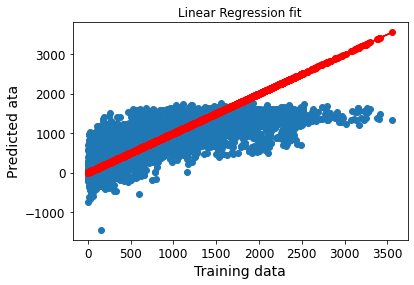

In [16]:
### Your code here
plt.scatter(y_train,y_pred_linear)
plt.title("Linear Regression fit")
plt.xlabel("Training data")
plt.ylabel("Predicted ata")
plt.plot(y_train,y_train,'r-o')

Now two other, different regression models (that you probably won't be familiar with) will be fit and later these will be compared to find the best one.

The second model to fit is ***Kernel Ridge*** regression (`from sklearn.kernel_ridge import KernelRidge`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

RMSE value for Kernel Ridge model : 436.6718865250186
Baseline RMSE value:  650.673486371936


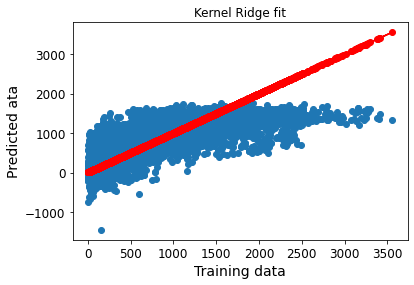

In [17]:
### Your code here
from sklearn.kernel_ridge import KernelRidge

kernel_pipeline = Pipeline([("preproc_pl", preproc_pl), ("Kernel Ridge", KernelRidge())])
kernel_model = kernel_pipeline.fit(X_train, y_train)
y_pred_kernel = kernel_model.predict(X_train)

# calculate rmse
mse = np.square(np.subtract(y_train,y_pred_kernel)).mean() 
rmse = math.sqrt(mse)
print('RMSE value for Kernel Ridge model :', rmse)
print('Baseline RMSE value: ', rmse_baseline)

# plot the fit
plt.scatter(y_train,y_pred_kernel)
plt.title("Kernel Ridge fit")
plt.xlabel("Training data")
plt.ylabel("Predicted ata")
plt.plot(y_train,y_train,'r-o')

The third, and most powerful model, is ***Support Vector Regression*** (`from sklearn.svm import SVR`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

RMSE value for Support Vector Regression model : 522.659116251486
Baseline RMSE value:  650.673486371936


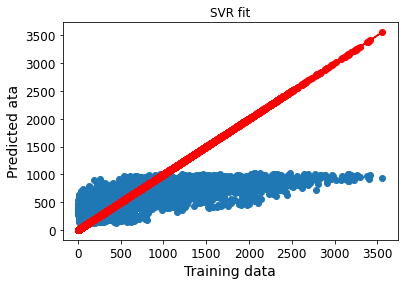

In [18]:
### Your code here
from sklearn.svm import SVR

svr_pipeline = Pipeline([("preproc_pl", preproc_pl), ("SVR", SVR())])
svr_model = svr_pipeline.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_train)

# calculate rmse
mse = np.square(np.subtract(y_train,y_pred_svr)).mean() 
rmse = math.sqrt(mse)
print('RMSE value for Support Vector Regression model :', rmse)
print('Baseline RMSE value: ', rmse_baseline)

# plot the fit
plt.scatter(y_train,y_pred_svr)
plt.title("SVR fit")
plt.xlabel("Training data")
plt.ylabel("Predicted ata")
plt.plot(y_train,y_train,'r-o')

## Step 4: Cross validation


In [19]:
### Your code here
#Cross validation prediction
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

# # For Linear Model
linear_cross = cross_validate(linear_model,X_train,y_train,cv=10, scoring='neg_root_mean_squared_error', return_train_score=True)
linear_cross_test_scores = np.abs(linear_cross['test_score'])
linear_cross_train_scores = np.abs(linear_cross['train_score'])
print('RMSE_linear_test:',linear_cross_test_scores)
print('RMSE_linear_train:',linear_cross_train_scores)
   
# # For Kernel Model
kernel_cross = cross_validate(kernel_model,X_train,y_train,cv=10, scoring='neg_root_mean_squared_error', return_train_score=True)
kernel_cross_test_scores = np.abs(kernel_cross['test_score'])
kernel_cross_train_scores = np.abs(kernel_cross['train_score'])
print('\nRMSE_kernel_test:',kernel_cross_test_scores)
print('RMSE_kernel_train:',kernel_cross_train_scores)

# # For SVR Model
svr_cross = cross_validate(svr_model,X_train,y_train,cv=10, scoring='neg_root_mean_squared_error', return_train_score=True)
svr_cross_test_scores = np.abs(svr_cross['test_score'])
svr_cross_train_scores = np.abs(svr_cross['train_score'])
print('\nRMSE_svr_test:',svr_cross_test_scores)
print('RMSE_svr_train:',svr_cross_train_scores)


RMSE_linear_test: [434.1284975  442.89360801 443.99297843 465.64713536 440.98472398
 417.80697194 422.78294026 460.35156697 425.47202589 423.88635   ]
RMSE_linear_train: [437.00785322 436.10152948 436.17686565 433.3967967  436.21669458
 438.76887495 438.22414637 434.0283627  437.9359671  438.11420178]

RMSE_kernel_test: [434.12169358 442.82813419 443.95419519 465.5535065  440.97401327
 417.79268276 422.81947796 460.43822487 425.48731056 423.85943754]
RMSE_kernel_train: [437.00904565 436.10296261 436.17813776 433.39830372 436.21787067
 438.77004218 438.22529619 434.02957572 437.93711381 438.11536438]

RMSE_svr_test: [530.77503191 541.84965476 525.25525673 555.56376469 537.12618112
 495.96292053 521.24961973 570.3567221  535.13568027 508.97323772]
RMSE_svr_train: [530.64403036 529.26660245 531.83219455 532.2778871  531.48081223
 532.92124623 536.28552518 528.82050122 533.64861424 535.75081977]


In [20]:
# mean and standard deviation of the rmse values

# Linear
print('Mean_linear_test:',np.mean(linear_cross_test_scores))
print('Standard_Deviation_linear_test:',linear_cross_test_scores.std())
print('Mean_linear_train:',np.mean(linear_cross_train_scores))
print('Standard_Deviation_linear_train:',linear_cross_train_scores.std())

# Kernel
print('\nMean_kernel_test:',np.mean(kernel_cross_test_scores))
print('Standard_Deviation_kernel_test:',kernel_cross_test_scores.std())
print('Mean_kernel_train:',np.mean(kernel_cross_train_scores))
print('Standard_Deviation_kernel_train:',kernel_cross_train_scores.std())

# SVR
print('\nMean_svr_test:',np.mean(svr_cross_test_scores))
print('Standard_Deviation_svr_test:',svr_cross_test_scores.std())
print('Mean_svr_train:',np.mean(svr_cross_train_scores))
print('Standard_Deviation_svr_train:',svr_cross_train_scores.std())

Mean_linear_test: 437.7946798345728
Standard_Deviation_linear_test: 15.30607041574445
Mean_linear_train: 436.59712925258964
Standard_Deviation_linear_train: 1.7039370683026431

Mean_kernel_test: 437.78286764128234
Standard_Deviation_kernel_test: 15.29756304097577
Mean_kernel_train: 436.59837126818337
Standard_Deviation_kernel_train: 1.7038527488453898

Mean_svr_test: 532.2248069554514
Standard_Deviation_svr_test: 20.372960854812234
Mean_svr_train: 532.2928233321707
Standard_Deviation_svr_train: 2.343881559731386


On the basis of the results you found above, would you say that any of the models were **under-fitting or over-fitting**?  

**Which method do you think is the best** out of these three?


From the above calculation we can find that all the 3 models have less training errors than the baseline that we have calculated as the loss function is lowering thus it is not underfitted. Also by comparing training rmse and validation rmse, we can see that the rmse values are somewhat similar to each other thus overfitting can be removed. We can say that the kernel ridge method is so far the best method comparing to other two.

## Step 5: Grid parameter search

In [21]:
### Your code here
from sklearn.model_selection import GridSearchCV
#print(kernel_pipeline.get_params().keys())
alpha = [6.0,8.0,9.0,11.0]
gridcv = GridSearchCV(kernel_pipeline, {'Kernel Ridge__alpha': alpha}, cv=10)
gridcv.fit(X_train, y_train)
# print(gridcv.best_params_)
print(f'Best params of {gridcv.best_params_}')

Best params of {'Kernel Ridge__alpha': 6.0}


In [22]:
kernel_pipeline_optimum = Pipeline([("preproc_pl", preproc_pl), ("Kernel Ridge", KernelRidge(alpha=6.0))])
kernel_model = kernel_pipeline_optimum.fit(X_train, y_train)
fit_model_predict = kernel_model.predict(X_test)
mse_test = np.square(np.subtract(y_test,fit_model_predict)).mean() 
rmse_test = math.sqrt(mse)
print('RMSE value of testing data using kernel ridge: ',rmse_test)
print('Baseline RMSE value: ', rmse_baseline)

RMSE value of testing data using kernel ridge:  522.659116251486
Baseline RMSE value:  650.673486371936


**How different was the test set performance to the validation performance, and is this suggestive of over-fitting, under-fitting or neither?**


We can say that the RMSE value for validation set and testing set are somewhat same. Also it can be seen that this is a good fit as this is not overfitting or underfitting as the values are almost the same.